In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn.csv


In [ ]:
# Load Dataset
df = pd.read_csv("netflix_customer_churn.csv")

df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


# **General Information**

In [ ]:
# Identify Duplicated and Null Value
print(df.duplicated().sum())
print(df.isnull().sum())

0
customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


# **PRELIMINARY DATA VISUALIZATION**

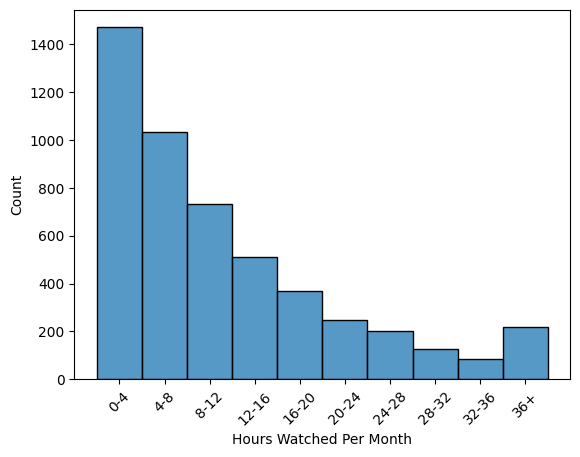

In [ ]:
# Create bins for Watch Hours
df['watch_hours'].max() #110.4
df['watch_hours'].min() #0.01
df['watch_hours'].mean() #11.64
df['watch_hours'].median() #8.0

bins = [0,4,8,12,16,20,24,28,32,36,110]
labels = ['0-4', '4-8', '8-12', '12-16','16-20', '20-24', '24-28', '28-32', '32-36', '36+']

df['hours_watched_binned'] = pd.cut(df['watch_hours'], bins=bins, labels=labels, include_lowest=True)

# Visualization for Watch Hours
sns.histplot(data=df, x='hours_watched_binned') #most ppl watched between 0-4 hours of netflix each month/week?
plt.xticks(rotation=45)
plt.xlabel('Hours Watched Per Month')
plt.show()

In [ ]:
df['avg_watch_time_per_day'].min()





0.0

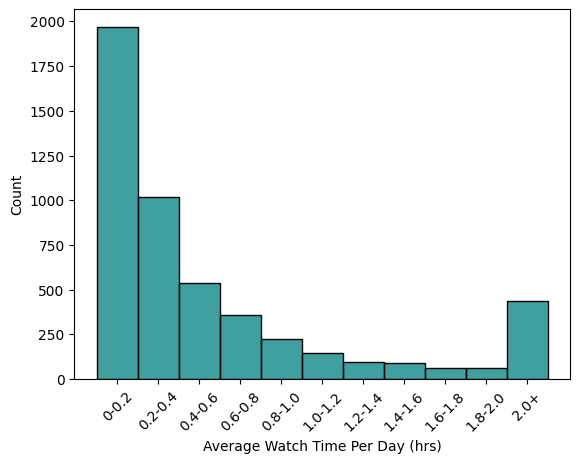

In [ ]:
# Create bins for Average Watch Time per Day
df['avg_watch_time_per_day'].min()
df['avg_watch_time_per_day'].max()
df['avg_watch_time_per_day'].mean()
df['avg_watch_time_per_day'].median()

bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 99]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.2', '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0+']

df['avg_watch_day_binned'] = pd.cut(df['avg_watch_time_per_day'], bins=bins, labels=labels, include_lowest=True)

# Visualization for Average Watch Time per Day
sns.histplot(data=df, x='avg_watch_day_binned', color = "teal")
plt.xticks(rotation=45)
plt.xlabel('Average Watch Time Per Day (hrs)')
plt.show()

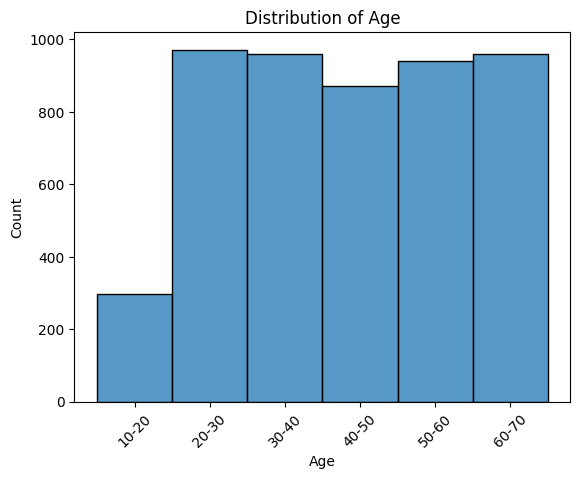

In [ ]:
# Create bins for Age
df['age'].mean()
df['age'].median()
df['age'].min()
df['age'].max()

bins = [0, 10, 20, 30, 40, 50 ,60, 70]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Visualization for Age
sns.histplot(data=df, x='age_binned')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.title("Distribution of Age")
plt.show()

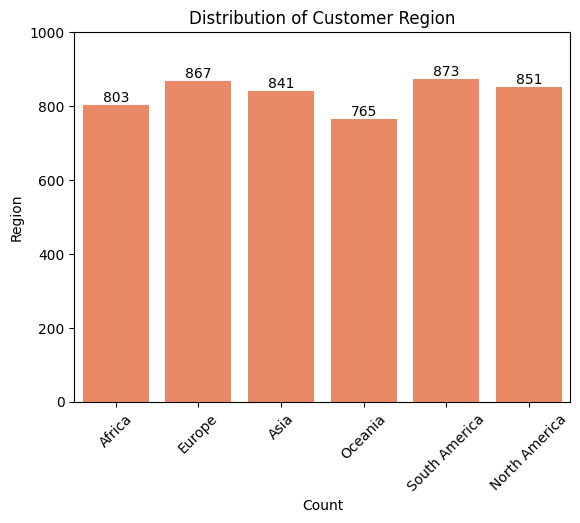

In [ ]:
# Visualization for Count of Region
ax = sns.countplot(data = df, x = "region", color = 'coral')
plt.xticks(rotation = 45)
plt.ylim(0,1000)
ax.bar_label(ax.containers[0])
plt.ylabel("Region")
plt.xlabel("Count")
plt.title("Distribution of Customer Region")
plt.show()

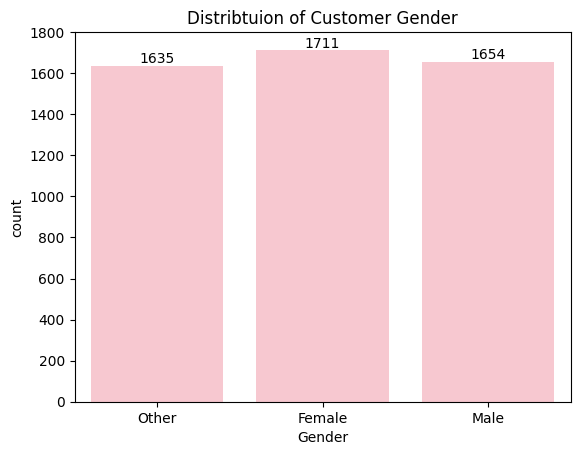

In [ ]:
# Visualization for Count of Gender
ax = sns.countplot(data =df, x = "gender", color = 'pink')
plt.ylim(0,1800)
ax.bar_label(ax.containers[0])
plt.xlabel("Gender")
plt.title("Distribtuion of Customer Gender")
plt.show()

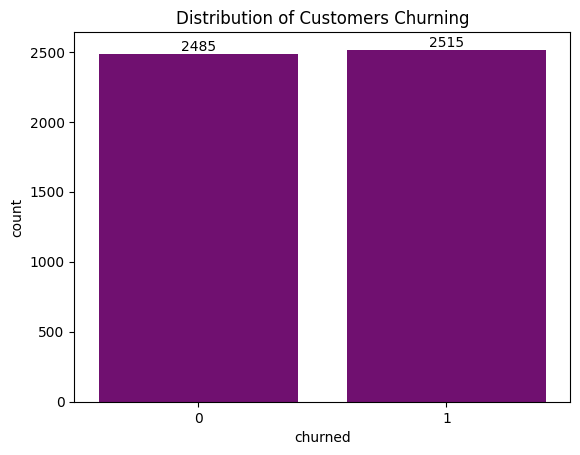

In [ ]:
# Visualization for Count of Churn
ax = sns.countplot(data = df, x = "churned", color = 'purple')
ax.bar_label(ax.containers[0])
plt.title("Distribution of Customers Churning")
plt.show()

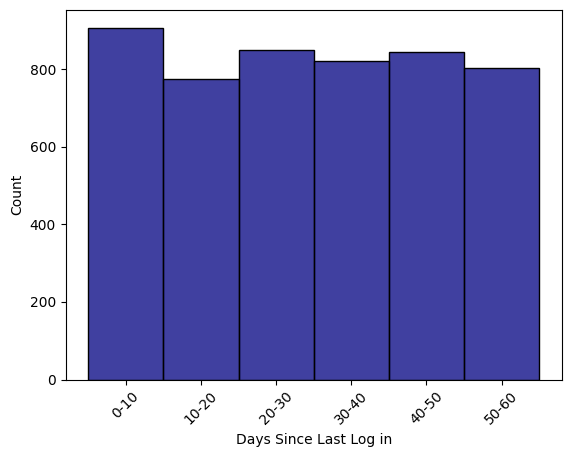

In [ ]:
#last log in days visualization
df['last_login_days'].mean()
#df['last_login_days'].median()
#df['last_login_days'].min()
#df['last_login_days'].max()

bins = [0, 10, 20, 30, 40, 50 ,60,]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']

df['login_binned'] = pd.cut(df['last_login_days'], bins=bins, labels=labels, include_lowest=True)

#Visualization for last login
sns.histplot(data=df, x='login_binned', color = "navy")
plt.xticks(rotation=45)
plt.xlabel('Days Since Last Log in')
plt.show()


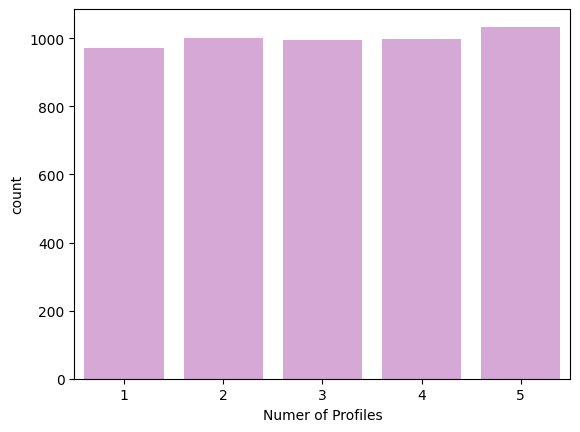

In [ ]:
sns.countplot(data=df, x = "number_of_profiles", color = "plum")
plt.xlabel("Numer of Profiles")
plt.show()


#ALL MACHINE LEARNING MODELS WITHOUHT PREPROCESSING DATA

# **LOGISTIC REGRESSION ANALYSIS**

In [ ]:
# Create Logistic Regression Model
cat_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
num_cols=['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles','avg_watch_time_per_day']

X = df[cat_cols + num_cols]
y = df['churned']

X =pd.get_dummies(X, columns=cat_cols, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without Standard Scaler
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

# With Standard Scaler
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])



log_model = LogisticRegression(max_iter =1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Performance
# Predicting Customer Churn
# No standardscaler
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Performance")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print("Precision:", round(precision_score(y_test, y_pred_log), 4))
print("Recall:", round(recall_score(y_test, y_pred_log), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_log), 4))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance
Accuracy: 0.89
Precision: 0.8757
Recall: 0.9105
F1 Score: 0.8928

Confusion Matrix
[[432  65]
 [ 45 458]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       497
           1       0.88      0.91      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



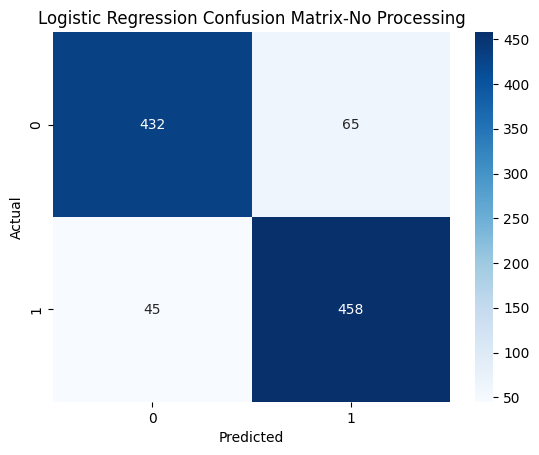

In [ ]:
# Visualization for Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix-No Processing")
plt.show()

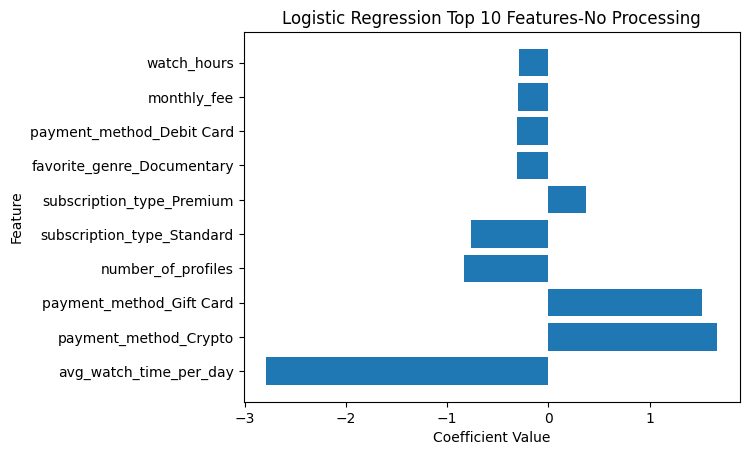

,Feature,Coef,abs_coef
5,avg_watch_time_per_day,-2.789310,2.789310
19,payment_method_Crypto,1.664801,1.664801
21,payment_method_Gift Card,1.520240,1.520240
4,number_of_profiles,-0.836090,0.836090
9,subscription_type_Standard,-0.764200,0.764200
8,subscription_type_Premium,0.366577,0.366577
24,favorite_genre_Documentary,-0.310319,0.310319
20,payment_method_Debit Card,-0.308029,0.308029
3,monthly_fee,-0.297331,0.297331
1,watch_hours,-0.294135,0.294135


In [ ]:
# Analysis for Feature Coefficient
coefs = log_model.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coef': coefs})
coef_df["abs_coef"] = coef_df["Coef"].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Visualization for Top 10 Features
top_n = 10

plt.barh(range(top_n), coef_df['Coef'][:top_n])
plt.yticks(range(top_n), coef_df['Feature'][:top_n])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Top 10 Features-No Processing')
plt.show()

coef_df.head(10)

In [ ]:
## with StandarScaler
#numeric_cols=['age', 'watch_hours', 'last_login_days', 'number_of_profiles','avg_watch_time_per_day']

#X_train_scaled = X_train.copy()
#X_test_scaled = X_test.copy()

#scaler = StandardScaler()
#X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
#X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

log_model_scaled = LogisticRegression(max_iter=1000)
log_model_scaled.fit(X_train_scaled, y_train)

y_pred_log_scaled = log_model_scaled.predict(X_test_scaled)

print("Logistic Performanc with StandardScaler on numerical columns")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log_scaled), 4))
print("Precision", round(precision_score(y_test, y_pred_log_scaled), 4))
print("Recall:", round(recall_score(y_test, y_pred_log_scaled), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_log_scaled), 4))



Logistic Performanc with StandardScaler on numerical columns
Accuracy: 0.887
Precision 0.875
Recall: 0.9046
F1 Score: 0.8895


In [ ]:
## 5 fold cv
log_model_scaled = LogisticRegression(max_iter=1000)
cv_scores_log_scaled = cross_val_score(log_model_scaled, X_train_scaled, y_train, cv=5, scoring='f1')
print("Logistic with StandardScaler - 5 fold cv f1")
print("Mean F1:", round(cv_scores_log_scaled.mean(), 4))
print("Standard Deviation:", round(cv_scores_log_scaled.std(), 4))

Logistic with StandardScaler - 5 fold cv f1
Mean F1: 0.8939
Standard Deviation: 0.0044


In [ ]:
## L1

log_model_l1 = LogisticRegression(max_iter =1000, penalty='l1', solver='liblinear')
log_model_l1.fit(X_train_scaled, y_train)
y_pred_log_l1 = log_model_l1.predict(X_test_scaled)

print("Logistic Performance with L1 and Standard Scaler")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log_l1), 4))
print("Precision:", round(precision_score(y_test, y_pred_log_l1), 4))
print("Recall:", round(recall_score(y_test, y_pred_log_l1), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_log_l1), 4))


cv_scores_log_l1 = cross_val_score(LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear'), X_train_scaled, y_train, cv=5, scoring='f1')

print("""Logistic Regression with L1 penalty - 5 fold cv f1""")
print("Mean F1:", round(cv_scores_log_l1.mean(), 4))
print("Standard Deviation:", round(cv_scores_log_l1.std(), 4))

Logistic Performance with L1 and Standard Scaler
Accuracy: 0.891
Precision: 0.8774
Recall: 0.9105
F1 Score: 0.8937
Logistic Regression with L1 penalty - 5 fold cv f1
Mean F1: 0.8982
Standard Deviation: 0.0045


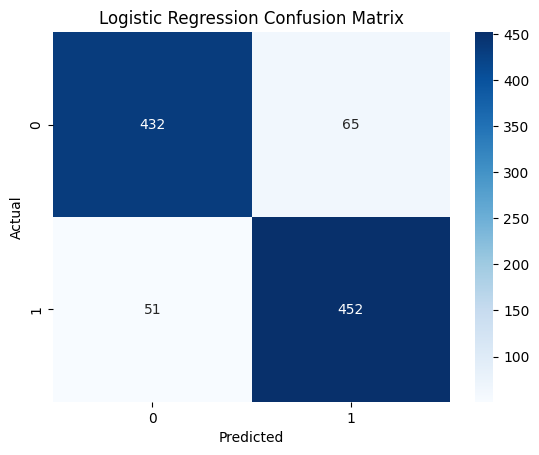

In [ ]:
cm_log_new = confusion_matrix(y_test, y_pred_log_l1)

sns.heatmap(cm_log_new, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

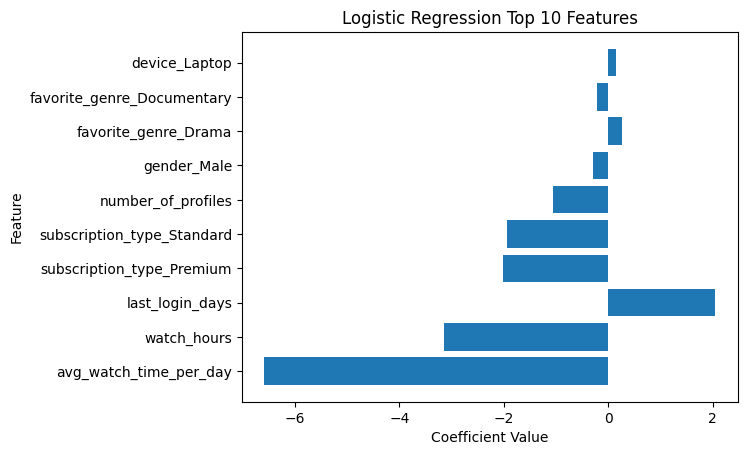

,Feature,Coef,abs_coef
4,avg_watch_time_per_day,-6.585699,6.585699
1,watch_hours,-3.148323,3.148323
2,last_login_days,2.049716,2.049716
7,subscription_type_Premium,-2.023556,2.023556
8,subscription_type_Standard,-1.934301,1.934301
3,number_of_profiles,-1.056494,1.056494
5,gender_Male,-0.290059,0.290059
20,favorite_genre_Drama,0.269829,0.269829
19,favorite_genre_Documentary,-0.216369,0.216369
14,device_Laptop,0.150768,0.150768


In [ ]:
# Analysis for Feature Coefficient With Processing and Kfold
coefs = log_model_l1.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coef': coefs})
coef_df["abs_coef"] = coef_df["Coef"].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Visualization for Top 10 Features
top_n = 10

plt.barh(range(top_n), coef_df['Coef'][:top_n])
plt.yticks(range(top_n), coef_df['Feature'][:top_n])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Top 10 Features')
plt.show()

coef_df.head(10)

# **DECISION TREE ANALYSIS**

In [ ]:
# Create Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
#dt_model = grid_search.best_estimator_
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Performance
# Predicting Customer Churn
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance")
print("Accuracy :", round(precision_score(y_test, y_pred_dt), 4))
print("Precision :", round(accuracy_score(y_test, y_pred_dt), 4))
print("Recall :", round(recall_score(y_test, y_pred_dt), 4))
print("F1 Score :", round(f1_score(y_test, y_pred_dt), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)

y_train_pred = dt_model.predict(X_train)
print("Train accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Test  accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))

Decision Tree Performance
Accuracy : 0.9704
Precision : 0.974
Recall : 0.9781
F1 Score : 0.9743

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       497
           1       0.97      0.98      0.97       503

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Train accuracy: 1.0
Test  accuracy: 0.974


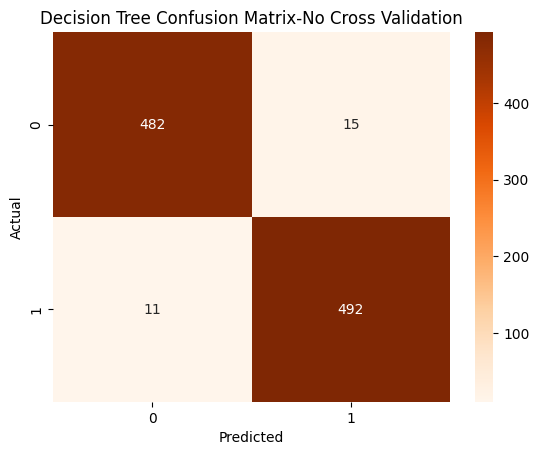

In [ ]:
# Visualization for Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix-No Cross Validation')
plt.show()

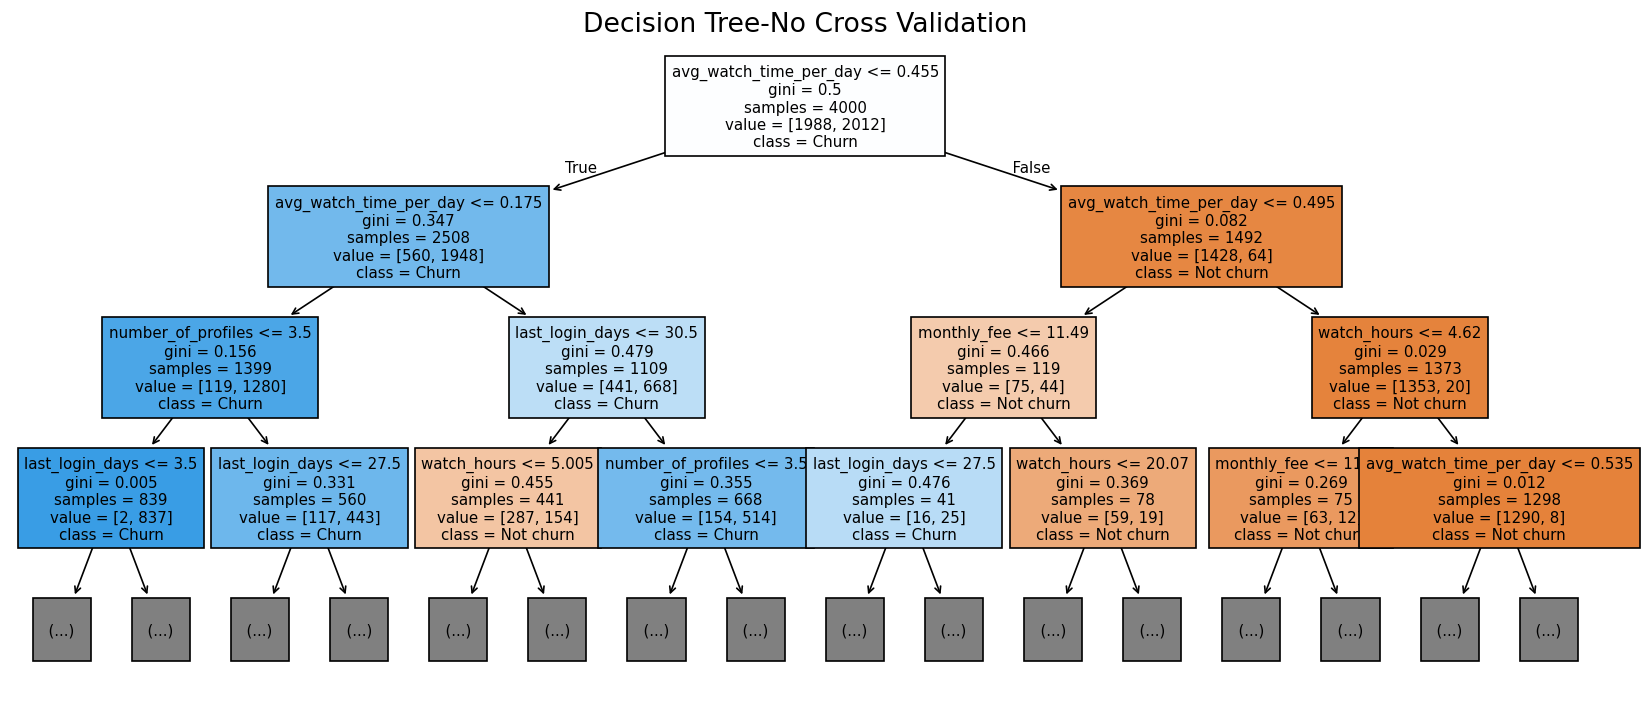

In [ ]:
plt.figure(figsize=(14,6), dpi=120)
tree.plot_tree(dt_model,feature_names=X.columns,class_names=["Not churn", "Churn"],filled=True,max_depth=3,fontsize=9)
plt.title("Decision Tree-No Cross Validation", fontsize=16)
plt.tight_layout()
plt.show()

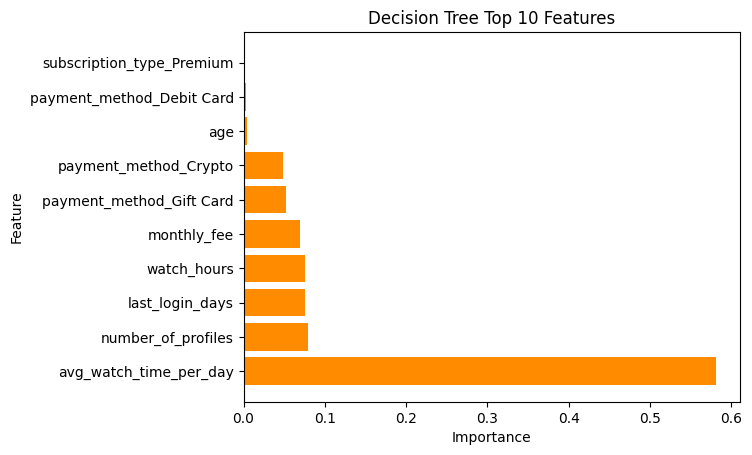

                      Feature  Importance
5      avg_watch_time_per_day    0.581062
4          number_of_profiles    0.079581
2             last_login_days    0.075582
1                 watch_hours    0.075073
3                 monthly_fee    0.069181
21   payment_method_Gift Card    0.051813
19      payment_method_Crypto    0.048388
0                         age    0.004796
20  payment_method_Debit Card    0.003298
8   subscription_type_Premium    0.001750


In [ ]:
# Top 10 Features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization for Top 10 Features
plt.barh(range(10), feature_importance['Importance'][:10], color = 'darkorange')
plt.yticks(range(10), feature_importance['Feature'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Decision Tree Top 10 Features")
plt.show()

print(feature_importance.head(10))

In [ ]:
# Apply Hyperparameter Tuning to find best depth
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best F1 score: 0.9810148346428409


In [ ]:
dt_model = grid_search.best_estimator_
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [ ]:
# Performance
# Predicting Customer Churn
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance")
print("Accuracy :", round(precision_score(y_test, y_pred_dt), 4))
print("Precision :", round(accuracy_score(y_test, y_pred_dt), 4))
print("Recall :", round(recall_score(y_test, y_pred_dt), 4))
print("F1 Score :", round(f1_score(y_test, y_pred_dt), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)

y_train_pred = dt_model.predict(X_train)
print("Train accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Test  accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))

Decision Tree Performance
Accuracy : 0.9859
Precision : 0.979
Recall : 0.9722
F1 Score : 0.979

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       497
           1       0.99      0.97      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Train accuracy: 0.9918
Test  accuracy: 0.979


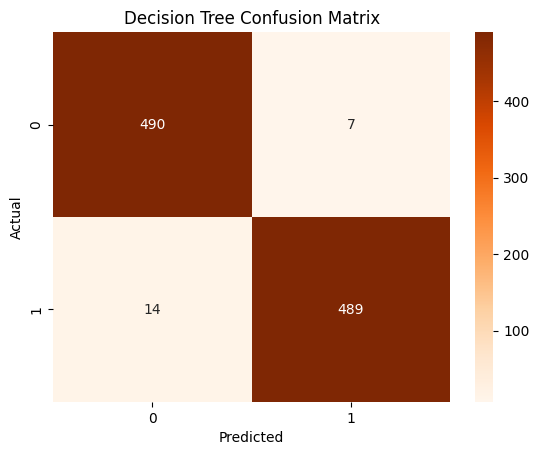

In [ ]:
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

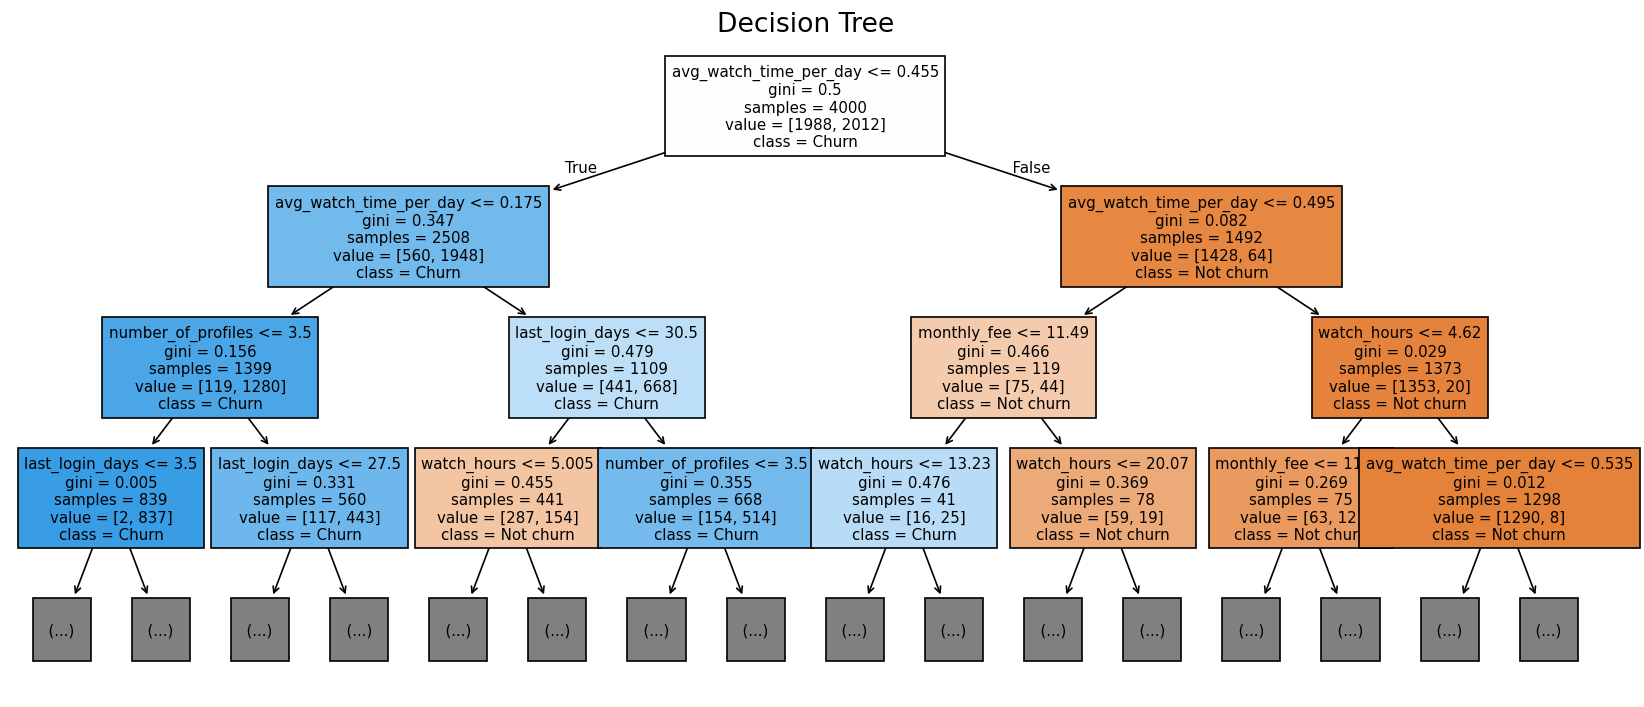

In [ ]:
plt.figure(figsize=(14,6), dpi=120)
tree.plot_tree(dt_model,feature_names=X.columns,class_names=["Not churn", "Churn"],filled=True,max_depth=3,fontsize=9)
plt.title("Decision Tree", fontsize=16)
plt.tight_layout()
plt.show()

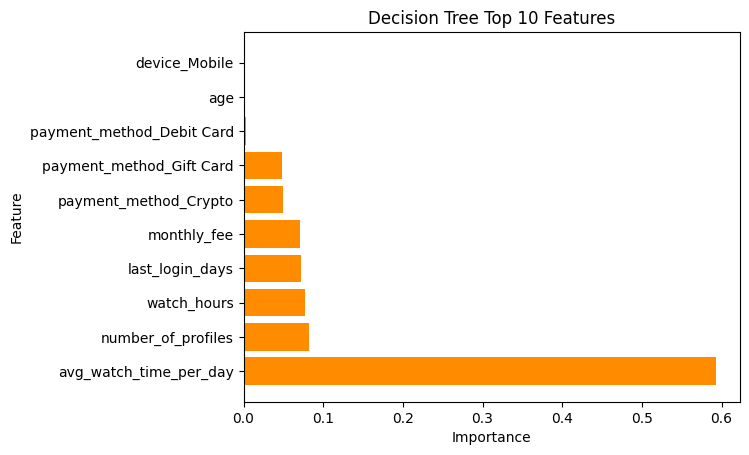

                      Feature  Importance
5      avg_watch_time_per_day    0.592949
4          number_of_profiles    0.081936
1                 watch_hours    0.076972
2             last_login_days    0.072037
3                 monthly_fee    0.070647
19      payment_method_Crypto    0.050165
21   payment_method_Gift Card    0.048747
20  payment_method_Debit Card    0.003368
0                         age    0.001015
16              device_Mobile    0.000438


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization for Top 10 Features
plt.barh(range(10), feature_importance['Importance'][:10], color = "darkorange")
plt.yticks(range(10), feature_importance['Feature'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Decision Tree Top 10 Features")
plt.show()

print(feature_importance.head(10))

# **RANDOM FOREST ANALYSIS**

In [ ]:
# Create Random Forest Model
#rf_model = grid_search.best_estimator_
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Best Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

y_train_pred_rf = rf_model.predict(X_train)
print("Train accuracy:", round(accuracy_score(y_train, y_train_pred_rf), 4))
print("Test  accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

Best Random Forest Performance:
Accuracy: 0.981
Precision: 0.9821
Recall: 0.9801
F1 Score: 0.9811

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Train accuracy: 1.0
Test  accuracy: 0.981


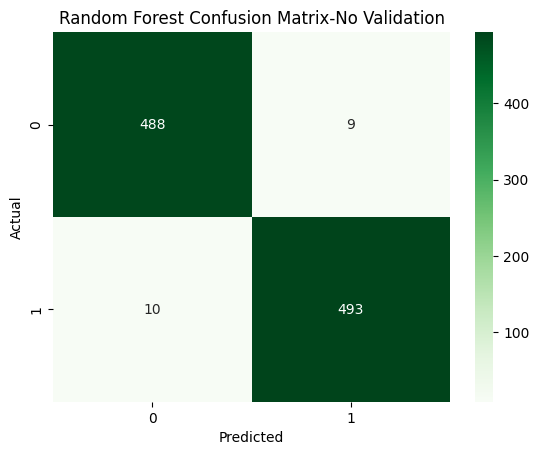

In [ ]:
# Visualization for Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=('Greens'))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix-No Validation')
plt.show()

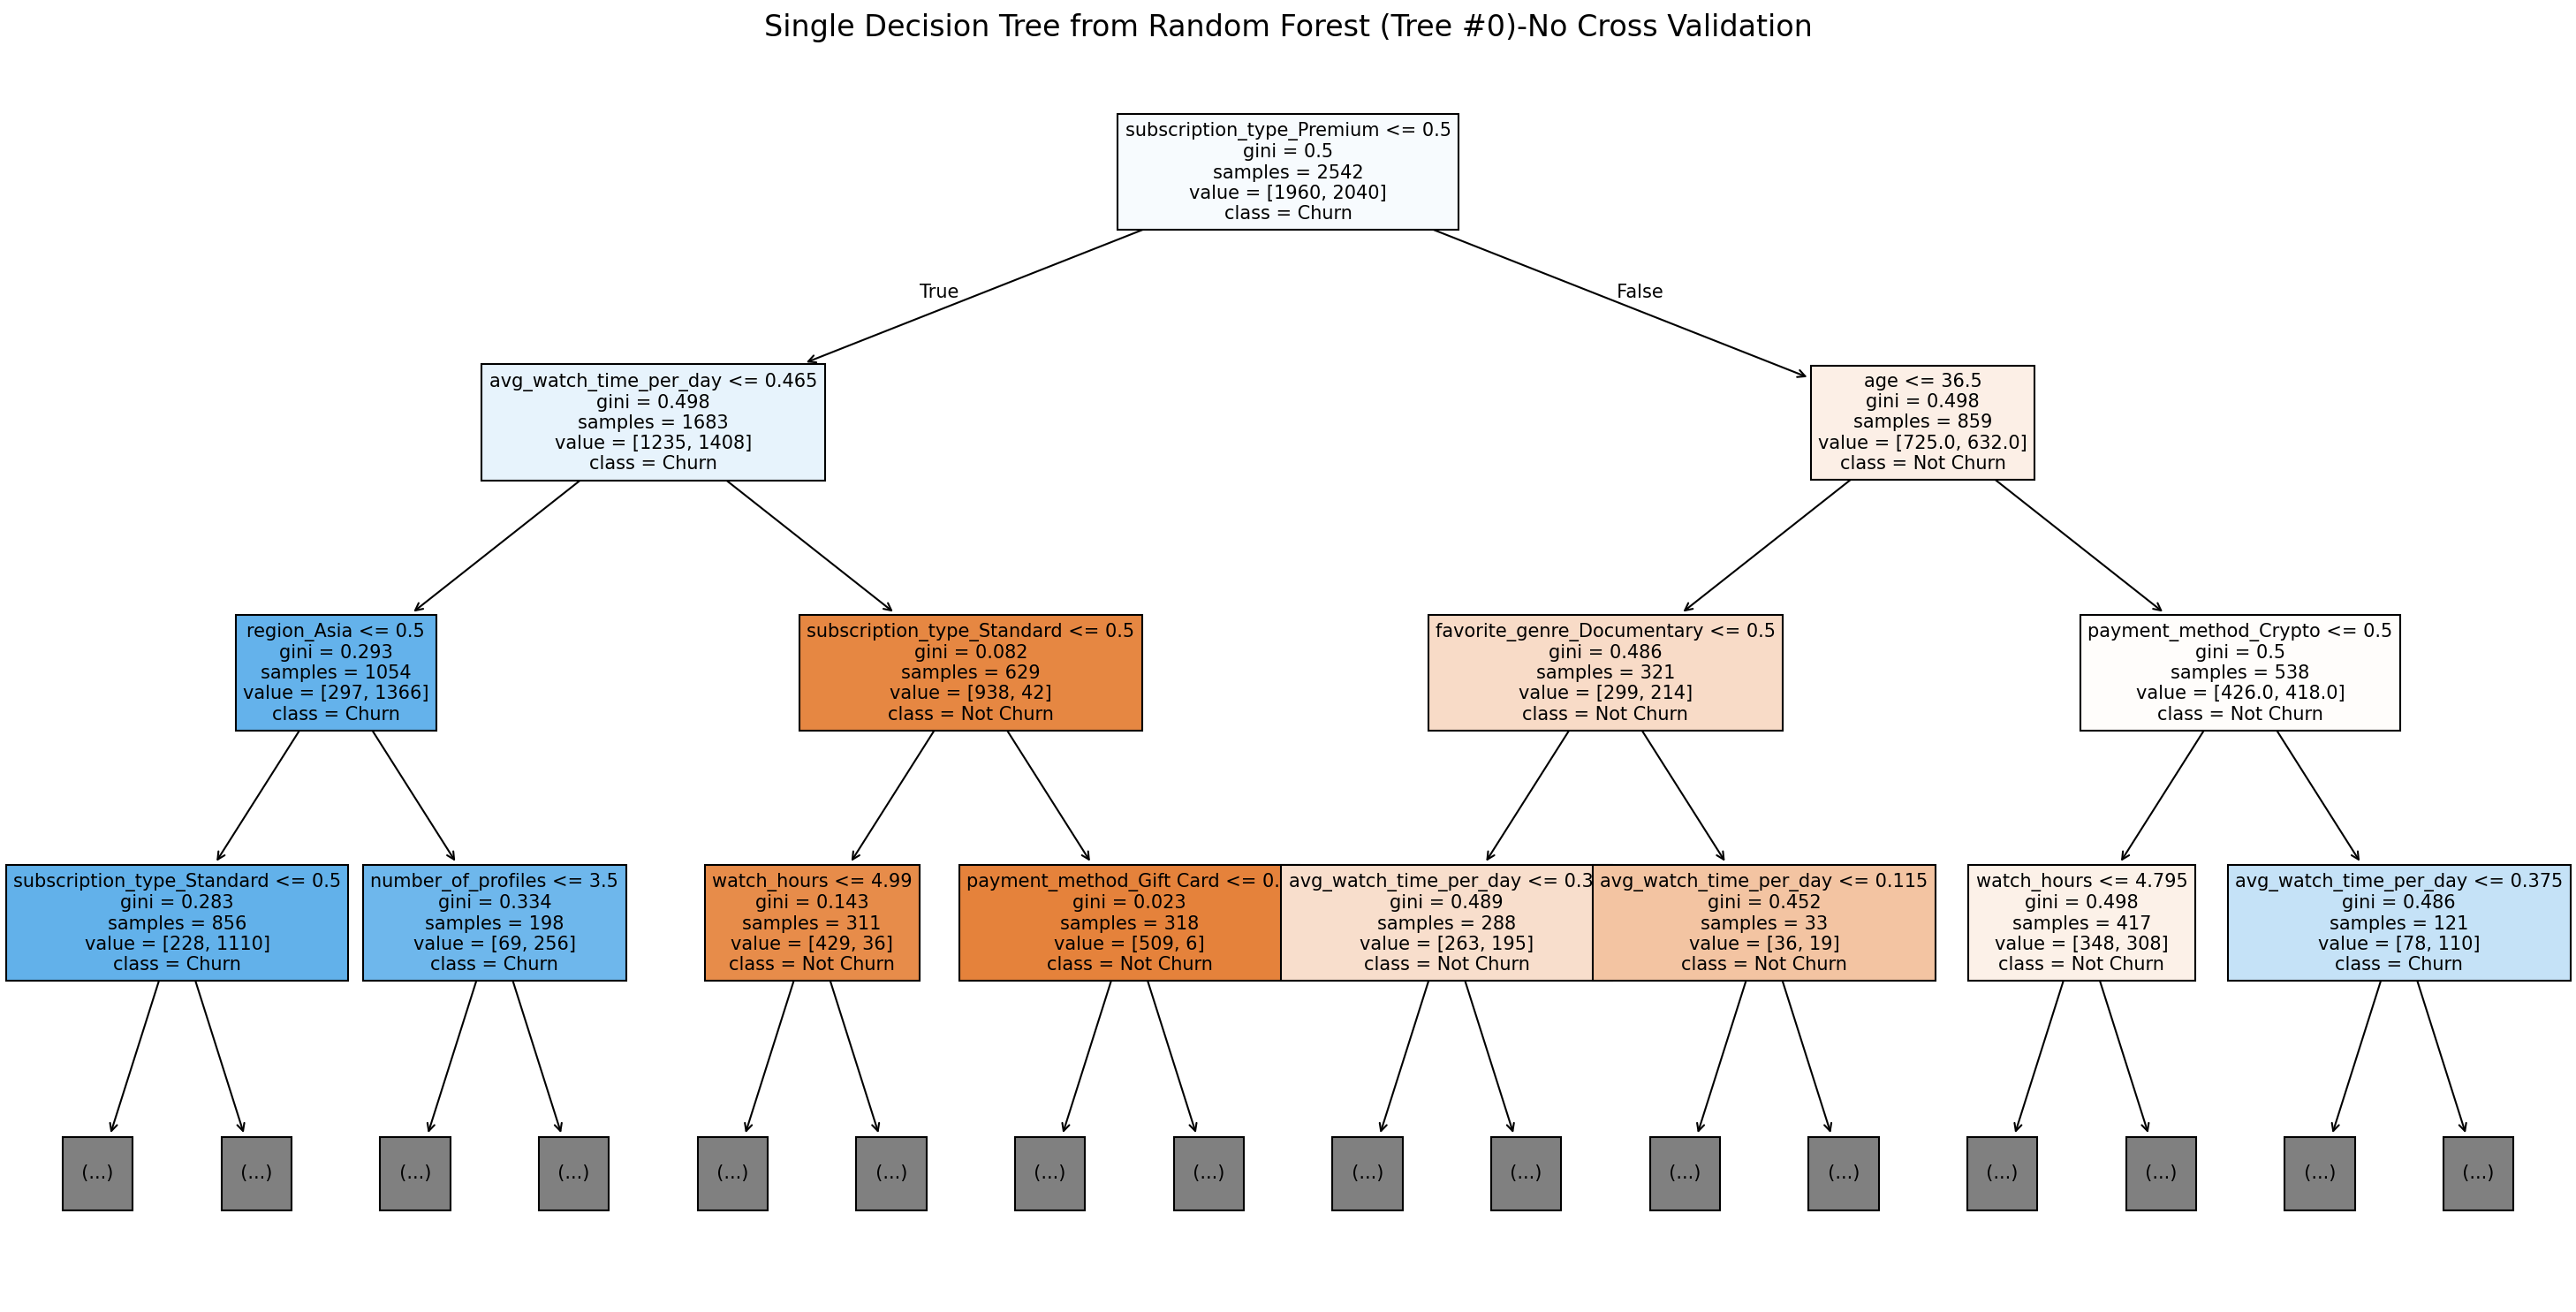

In [ ]:
# Plot the first tree (or any tree) from the forest
plt.figure(figsize=(20, 10), dpi=150)
tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["Not Churn", "Churn"], filled=True, max_depth=3, fontsize=10)
plt.title("Single Decision Tree from Random Forest (Tree #0)-No Cross Validation", fontsize=16)
plt.tight_layout()
plt.show()

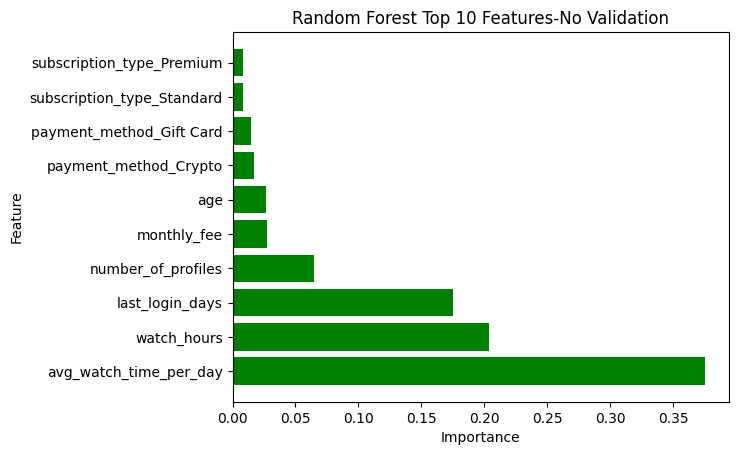

                       Feature  Importance
5       avg_watch_time_per_day    0.375306
1                  watch_hours    0.203436
2              last_login_days    0.175428
4           number_of_profiles    0.064898
3                  monthly_fee    0.027191
0                          age    0.026299
19       payment_method_Crypto    0.016749
21    payment_method_Gift Card    0.014594
9   subscription_type_Standard    0.008395
8    subscription_type_Premium    0.007997


In [ ]:
# Top 10 Features
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization for Top 10 Features
plt.barh(range(10), feature_importance_rf['Importance'][:10], color = 'green')
plt.yticks(range(10), feature_importance_rf['Feature'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Random Forest Top 10 Features-No Validation")
plt.show()

print(feature_importance_rf.head(10))

random forest after hyperparameteric tuning

In [ ]:
# Apply Hyperparameter Tuning to find best depth
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42)

#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (CV):", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Best F1 Score (CV): 0.9777696083448136


In [ ]:
rf_model = random_search.best_estimator_
y_pred_rf = rf_model.predict(X_test)

print("Best Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

y_train_pred_rf = rf_model.predict(X_train)
print("Train accuracy:", round(accuracy_score(y_train, y_train_pred_rf), 4))
print("Test  accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

Best Random Forest Performance:
Accuracy: 0.98
Precision: 0.9801
Recall: 0.9801
F1 Score: 0.9801

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Train accuracy: 1.0
Test  accuracy: 0.98


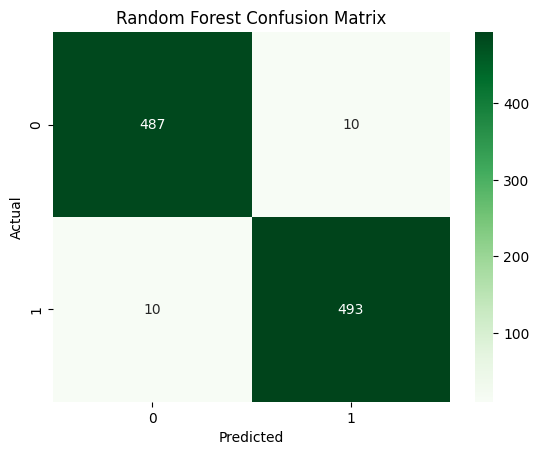

In [ ]:
# Visualization for Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

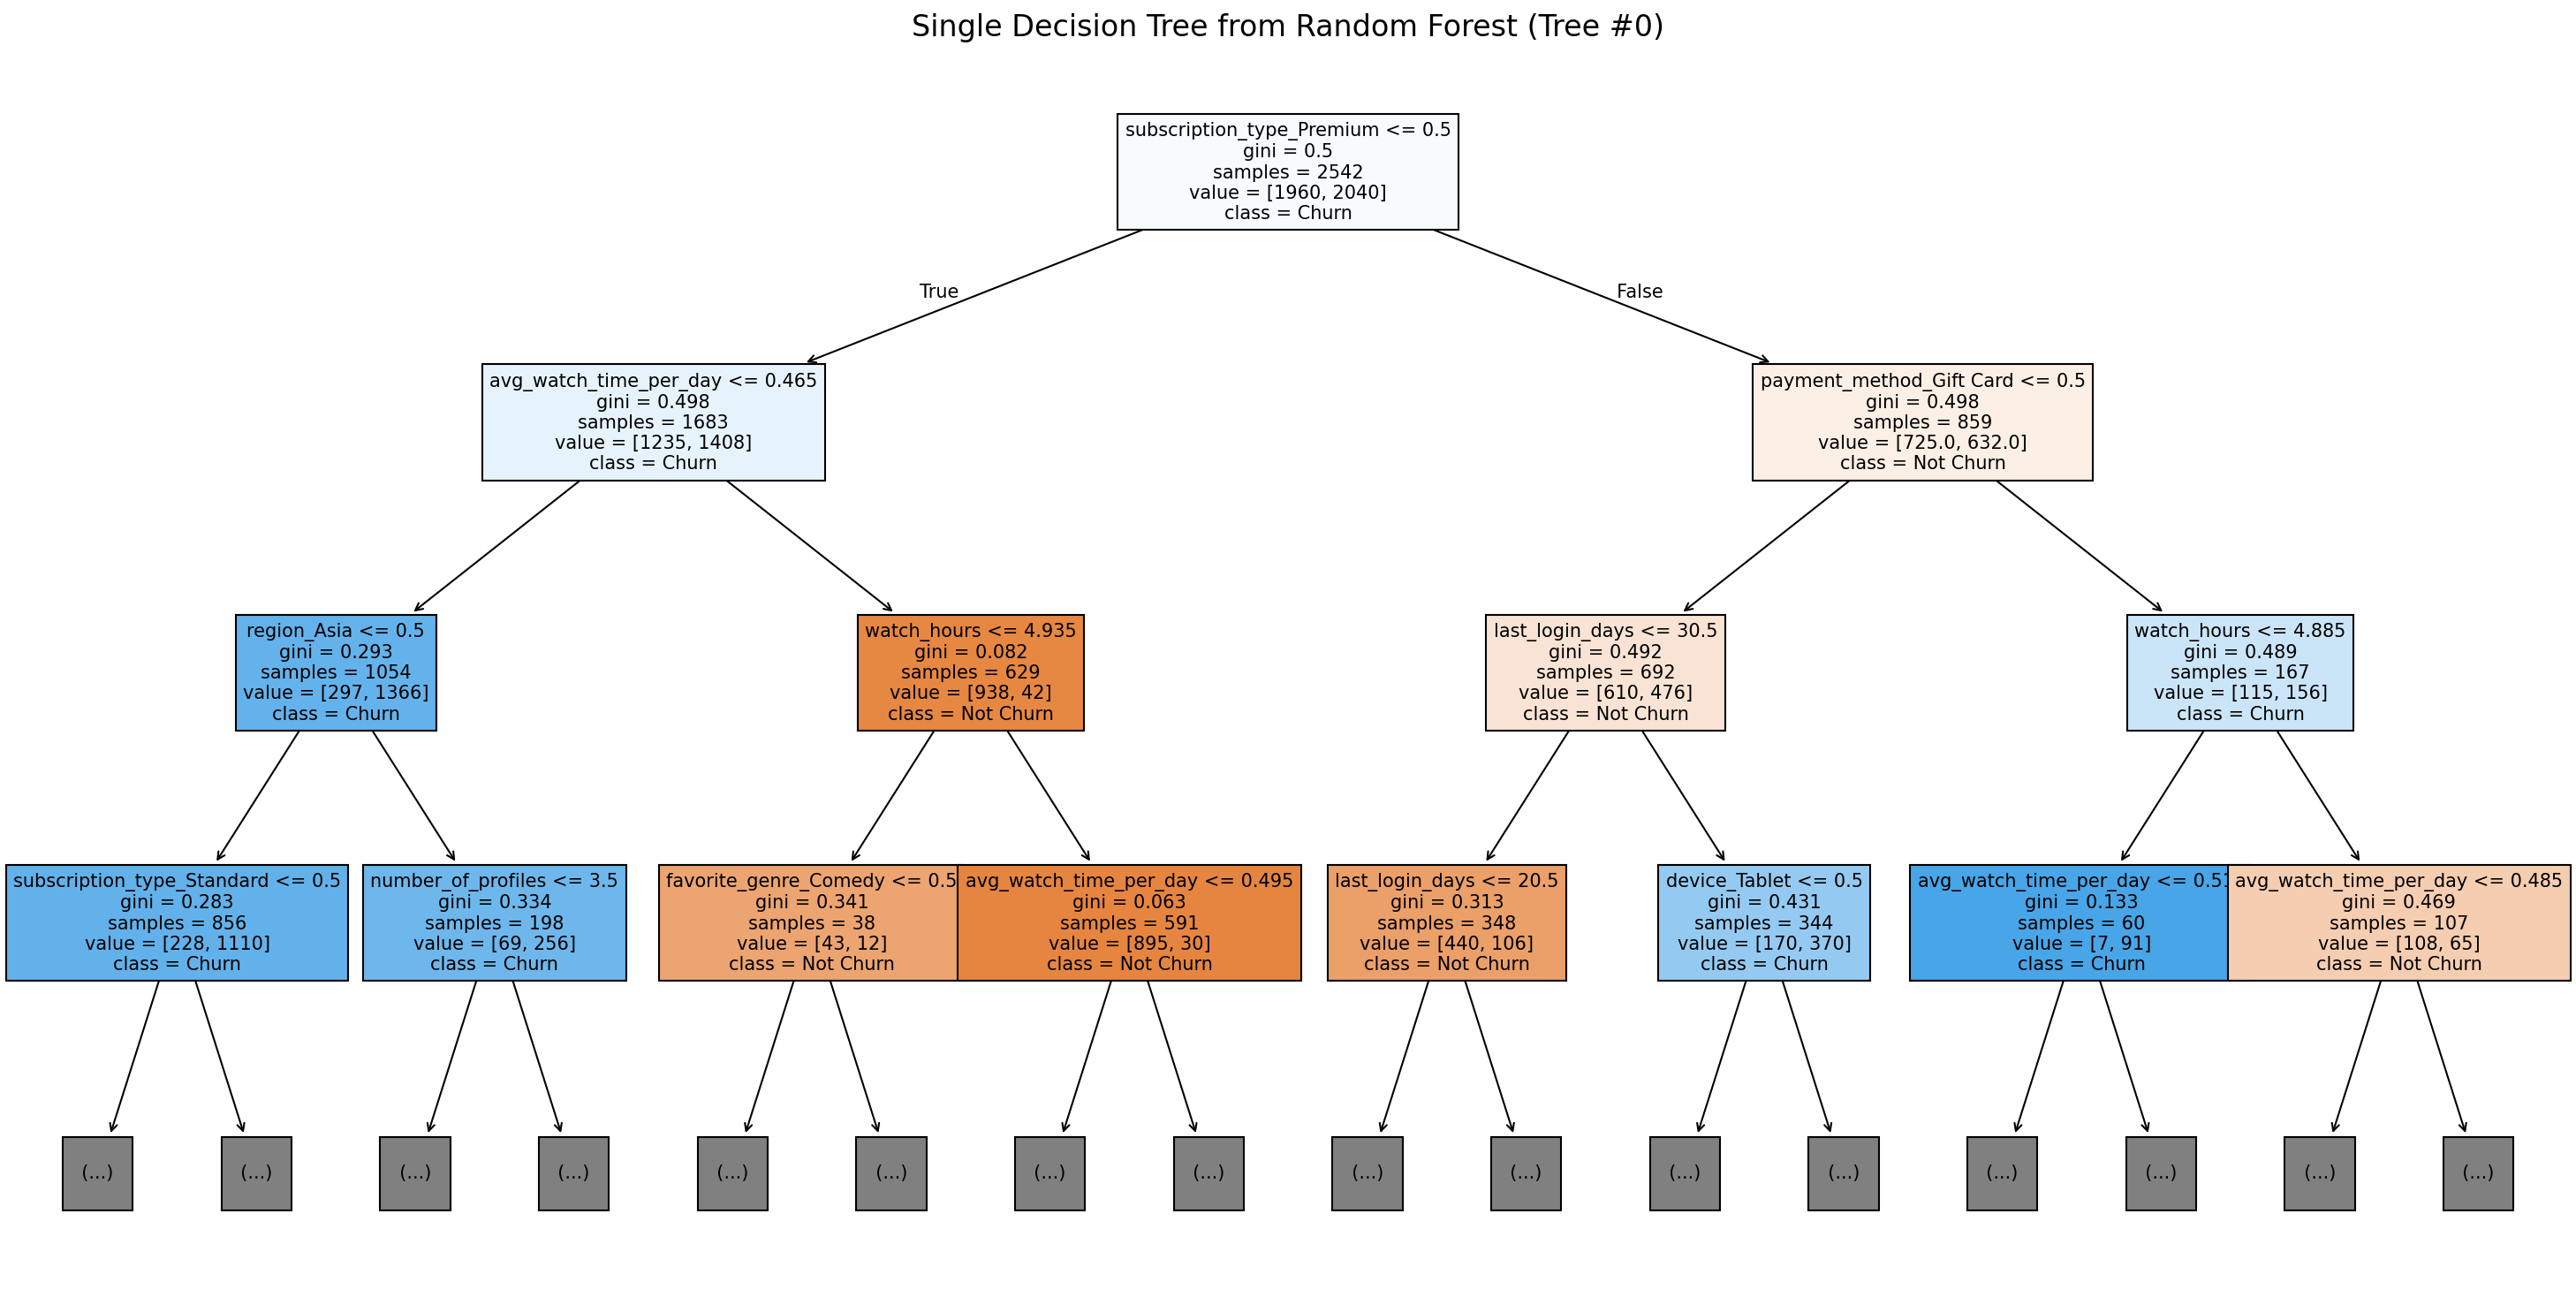

In [ ]:
# Plot the first tree (or any tree) from the forest
plt.figure(figsize=(20, 10), dpi=150)
tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["Not Churn", "Churn"], filled=True, max_depth=3, fontsize=10)
plt.title("Single Decision Tree from Random Forest (Tree #0)", fontsize=16)
plt.tight_layout()
plt.show()

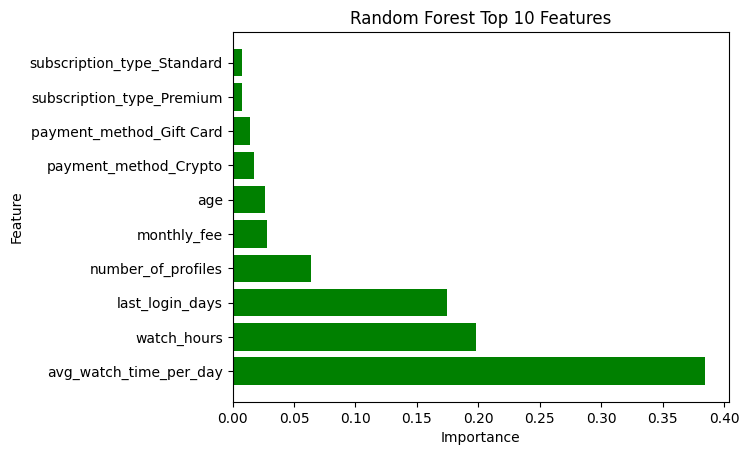

                       Feature  Importance
5       avg_watch_time_per_day    0.384314
1                  watch_hours    0.198003
2              last_login_days    0.174653
4           number_of_profiles    0.063605
3                  monthly_fee    0.028251
0                          age    0.026399
19       payment_method_Crypto    0.017542
21    payment_method_Gift Card    0.014309
8    subscription_type_Premium    0.007826
9   subscription_type_Standard    0.007583


In [ ]:
# Top 10 Features
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization for Top 10 Features
plt.barh(range(10), feature_importance_rf['Importance'][:10], color = "green")
plt.yticks(range(10), feature_importance_rf['Feature'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Random Forest Top 10 Features")
plt.show()

print(feature_importance_rf.head(10))